# Hugging Face Pipelines

Pipelines make it simple to pull in any model from the Hugging Face hub. All you need to do is specify the path of the model and tell it the type of analysis you wish to do.

You can usually also interact with the model via the web interface API on the Hugging Face website.


# Pipeline Tasks

![List of pipeline options](pipeline-options.png)


## Sentiment Analysis

Use the Inference API
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

RoBERTa is a transformers model pretrained on a large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts.

In [16]:
from transformers import pipeline

In [26]:
pipe = pipeline("sentiment-analysis")
pipe("This restaurant is awesome!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998717308044434}]

In [5]:
# details on this model are at: https://huggingface.co/FacebookAI/roberta-large-mnli
pipe = pipeline("text-classification", model="FacebookAI/roberta-large-mnli")

#find contradictions
pipe("I hate you. I love you.")


Some weights of the model checkpoint at FacebookAI/roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'CONTRADICTION', 'score': 0.9993570446968079}]

In [19]:
from transformers import pipeline
# This model is a `zero-shot-classification` model.
# It will classify text, except you are free to choose any label you might imagine
classifier = pipeline(model="facebook/bart-large-mnli")
classifier(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036352872848511,
  0.4787995517253876,
  0.01260063424706459,
  0.0026557790115475655,
  0.0023087707813829184]}

# Text Generation

In [20]:
from transformers import pipeline
pipe = pipeline("text-generation")
pipe("As far as I am concerned, I will")


No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "As far as I am concerned, I will get a good headstart. Because this was a real project I can finally break free of what life was like, and live with what I've experienced as a father who's come into my life and helped"}]

# Text Summarization

In [21]:
from transformers import pipeline
pipe = pipeline("summarization")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""


print(pipe(ARTICLE, max_length=130, min_length=30, do_sample=False))

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say .'}]


# Translation

### You could translate all of your documentation on you own hardware and network!

### Don't need to hunt down the best translations model, just tell the pipeline the task.

For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub. Here we’ll try translating from French to English:

In [22]:
from transformers import pipeline

translator = pipeline("translation_en_to_fr")
translator("My name is Justin")


No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'translation_text': 'Mon nom est Justin'}]

## Speech Recognition
https://huggingface.co/facebook/wav2vec2-base-960h

Small model 94 million parameters. See the results!
 

In [10]:
from transformers import pipeline
transcriber = pipeline(task="automatic-speech-recognition")
transcriber("mlk.flac")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebo

{'text': 'I HAVE A DREAM BUT ONE DAY THIS NATION WILL RISE UP LIVE UP THE TRUE MEANING OF ITS TREES'}

## Speech Recognition
Let's try a larger model by Open AI called Whisper.
1.5 Billion parameters. See the results now!

In [11]:
transcriber = pipeline(model="openai/whisper-large-v2")
transcriber("mlk.flac")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

## Computer Vision

In [23]:
from transformers import pipeline

vision_classifier = pipeline(model="google/vit-base-patch16-224")
preds = vision_classifier(
    images="pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.4335, 'label': 'lynx, catamount'}
{'score': 0.0348, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}
{'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'}
{'score': 0.0239, 'label': 'Egyptian cat'}
{'score': 0.0229, 'label': 'tiger cat'}


No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a 

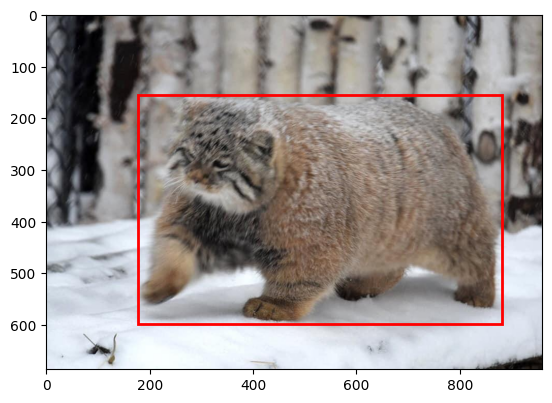

In [24]:
from transformers import pipeline
from PIL import Image

detector = pipeline(task="object-detection")
preds = detector(
    "pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"], "box": pred["box"]} for pred in preds]
preds

import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Load the image
image_path = "pipeline-cat-chonk.jpeg"
image = Image.open(image_path)

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Draw bounding box(es)
for pred in preds:
    xmin, ymin, xmax, ymax = pred["box"]["xmin"], pred["box"]["ymin"], pred["box"]["xmax"], pred["box"]["ymax"]
    width = xmax - xmin
    height = ymax - ymin
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

# Show the plot
plt.show()


In [25]:
from transformers import pipeline

vqa = pipeline(model="impira/layoutlm-document-qa")
output = vqa(
    image="invoice.png",
    question="What is the invoice number?",
    #question="Who should we ship to?",
)
output[0]["score"] = round(output[0]["score"], 3)
output

[{'score': 1.0, 'answer': 'us-001', 'start': 15, 'end': 15}]